<a href="https://colab.research.google.com/github/ibonetc/AI_Deep-Learning/blob/main/Transformers_HuggingFace_Imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformers

- Clasificación de imágenes
- Traducir audios
- De texto a imágenes

**Nota**: Intalar estas bibliotecas y reiniciar el entorno

In [ ]:
!pip install transformers[sentencepiece]

In [ ]:
!pip install transformers
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import transformers
print(transformers.__version__)

4.44.2


In [ ]:
import torch
from transformers import pipeline
from transformers import pipeline, AutoImageProcessor, AutoModelForImageClassification

## Clasificación de imágenes

In [ ]:
vision_classifier = pipeline(
  task="image-classification",
  model='google/vit-base-patch16-224',
  use_fast=True,
  device=0)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [ ]:
'''
processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224", use_fast=True)
model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")

vision_classifier = pipeline(
  task="image-classification",
  model=model,
  image_processor=processor,
  device=0  # Usa GPU
)
'''

In [ ]:
prediction=vision_classifier(images="/content/drive/MyDrive/Fotos_Pruebas/cisneNegro.jpg")
print('Clase:', prediction[0]['label'] , prediction[0]['score']*100)

Clase: black swan, Cygnus atratus 99.56652522087097


In [ ]:
prediction

[{'label': 'black swan, Cygnus atratus', 'score': 0.9956652522087097},
 {'label': 'goose', 'score': 0.0003855969407595694},
 {'label': 'lakeside, lakeshore', 'score': 0.00024381505500059575},
 {'label': 'American coot, marsh hen, mud hen, water hen, Fulica americana',
  'score': 0.00020543194841593504},
 {'label': 'European gallinule, Porphyrio porphyrio',
  'score': 9.25119238672778e-05}]

In [ ]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image

In [ ]:
image = Image.open("/content/drive/MyDrive/Fotos_Pruebas/cisneNegro.jpg")

In [ ]:
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

In [ ]:
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

predicted_class_idx = logits.argmax(-1).item()
print("Clase:", model.config.id2label[predicted_class_idx])
proba = logits.softmax(1)
print("Probabilidad:", proba[0][predicted_class_idx].item()*100)

Clase: normal
Probabilidad: 99.98667240142822


In [ ]:
print(proba.shape)

torch.Size([1, 1000])


In [ ]:
pipe = pipeline("image-classification", model="apple/mobilevit-small", device="cuda")

In [ ]:
prediction=vision_classifier(images="/content/drive/MyDrive/Fotos_Pruebas/cisneNegro.jpg")
print('Clase:', prediction[0]['label'] , prediction[0]['score']*100)

Clase: black swan, Cygnus atratus 99.56652522087097


## Detección de objetos

In [ ]:
from os import path
path_image = "/content/drive/MyDrive/Fotos_Pruebas/habana.jpg"
habana = Image.open(path_image)

In [ ]:
from transformers import DetrImageProcessor, DetrForObjectDetection

In [ ]:
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

In [ ]:
inputs = processor(images=habana, return_tensors="pt")
outputs = model(**inputs)
target_sizes = torch.tensor([habana.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )


Detected car with confidence 0.995 at location [1518.94, 1397.56, 1886.99, 1555.24]
Detected person with confidence 0.925 at location [855.33, 1369.29, 896.32, 1446.06]
Detected motorcycle with confidence 0.989 at location [172.45, 1420.37, 441.19, 1572.26]
Detected car with confidence 0.996 at location [3527.53, 1404.07, 3843.13, 1506.95]
Detected person with confidence 0.901 at location [1489.77, 1387.36, 1530.47, 1465.01]
Detected person with confidence 0.96 at location [301.11, 1380.19, 376.97, 1473.48]
Detected car with confidence 0.998 at location [837.38, 1390.76, 1508.29, 1580.7]
Detected person with confidence 0.917 at location [847.57, 1400.77, 903.24, 1507.19]
Detected car with confidence 0.995 at location [2340.12, 1393.78, 2613.41, 1527.71]
Detected car with confidence 0.954 at location [730.09, 1378.64, 818.34, 1439.62]
Detected car with confidence 0.995 at location [1898.67, 1385.04, 2376.99, 1549.98]
Detected person with confidence 1.0 at location [2457.35, 1096.66, 349

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

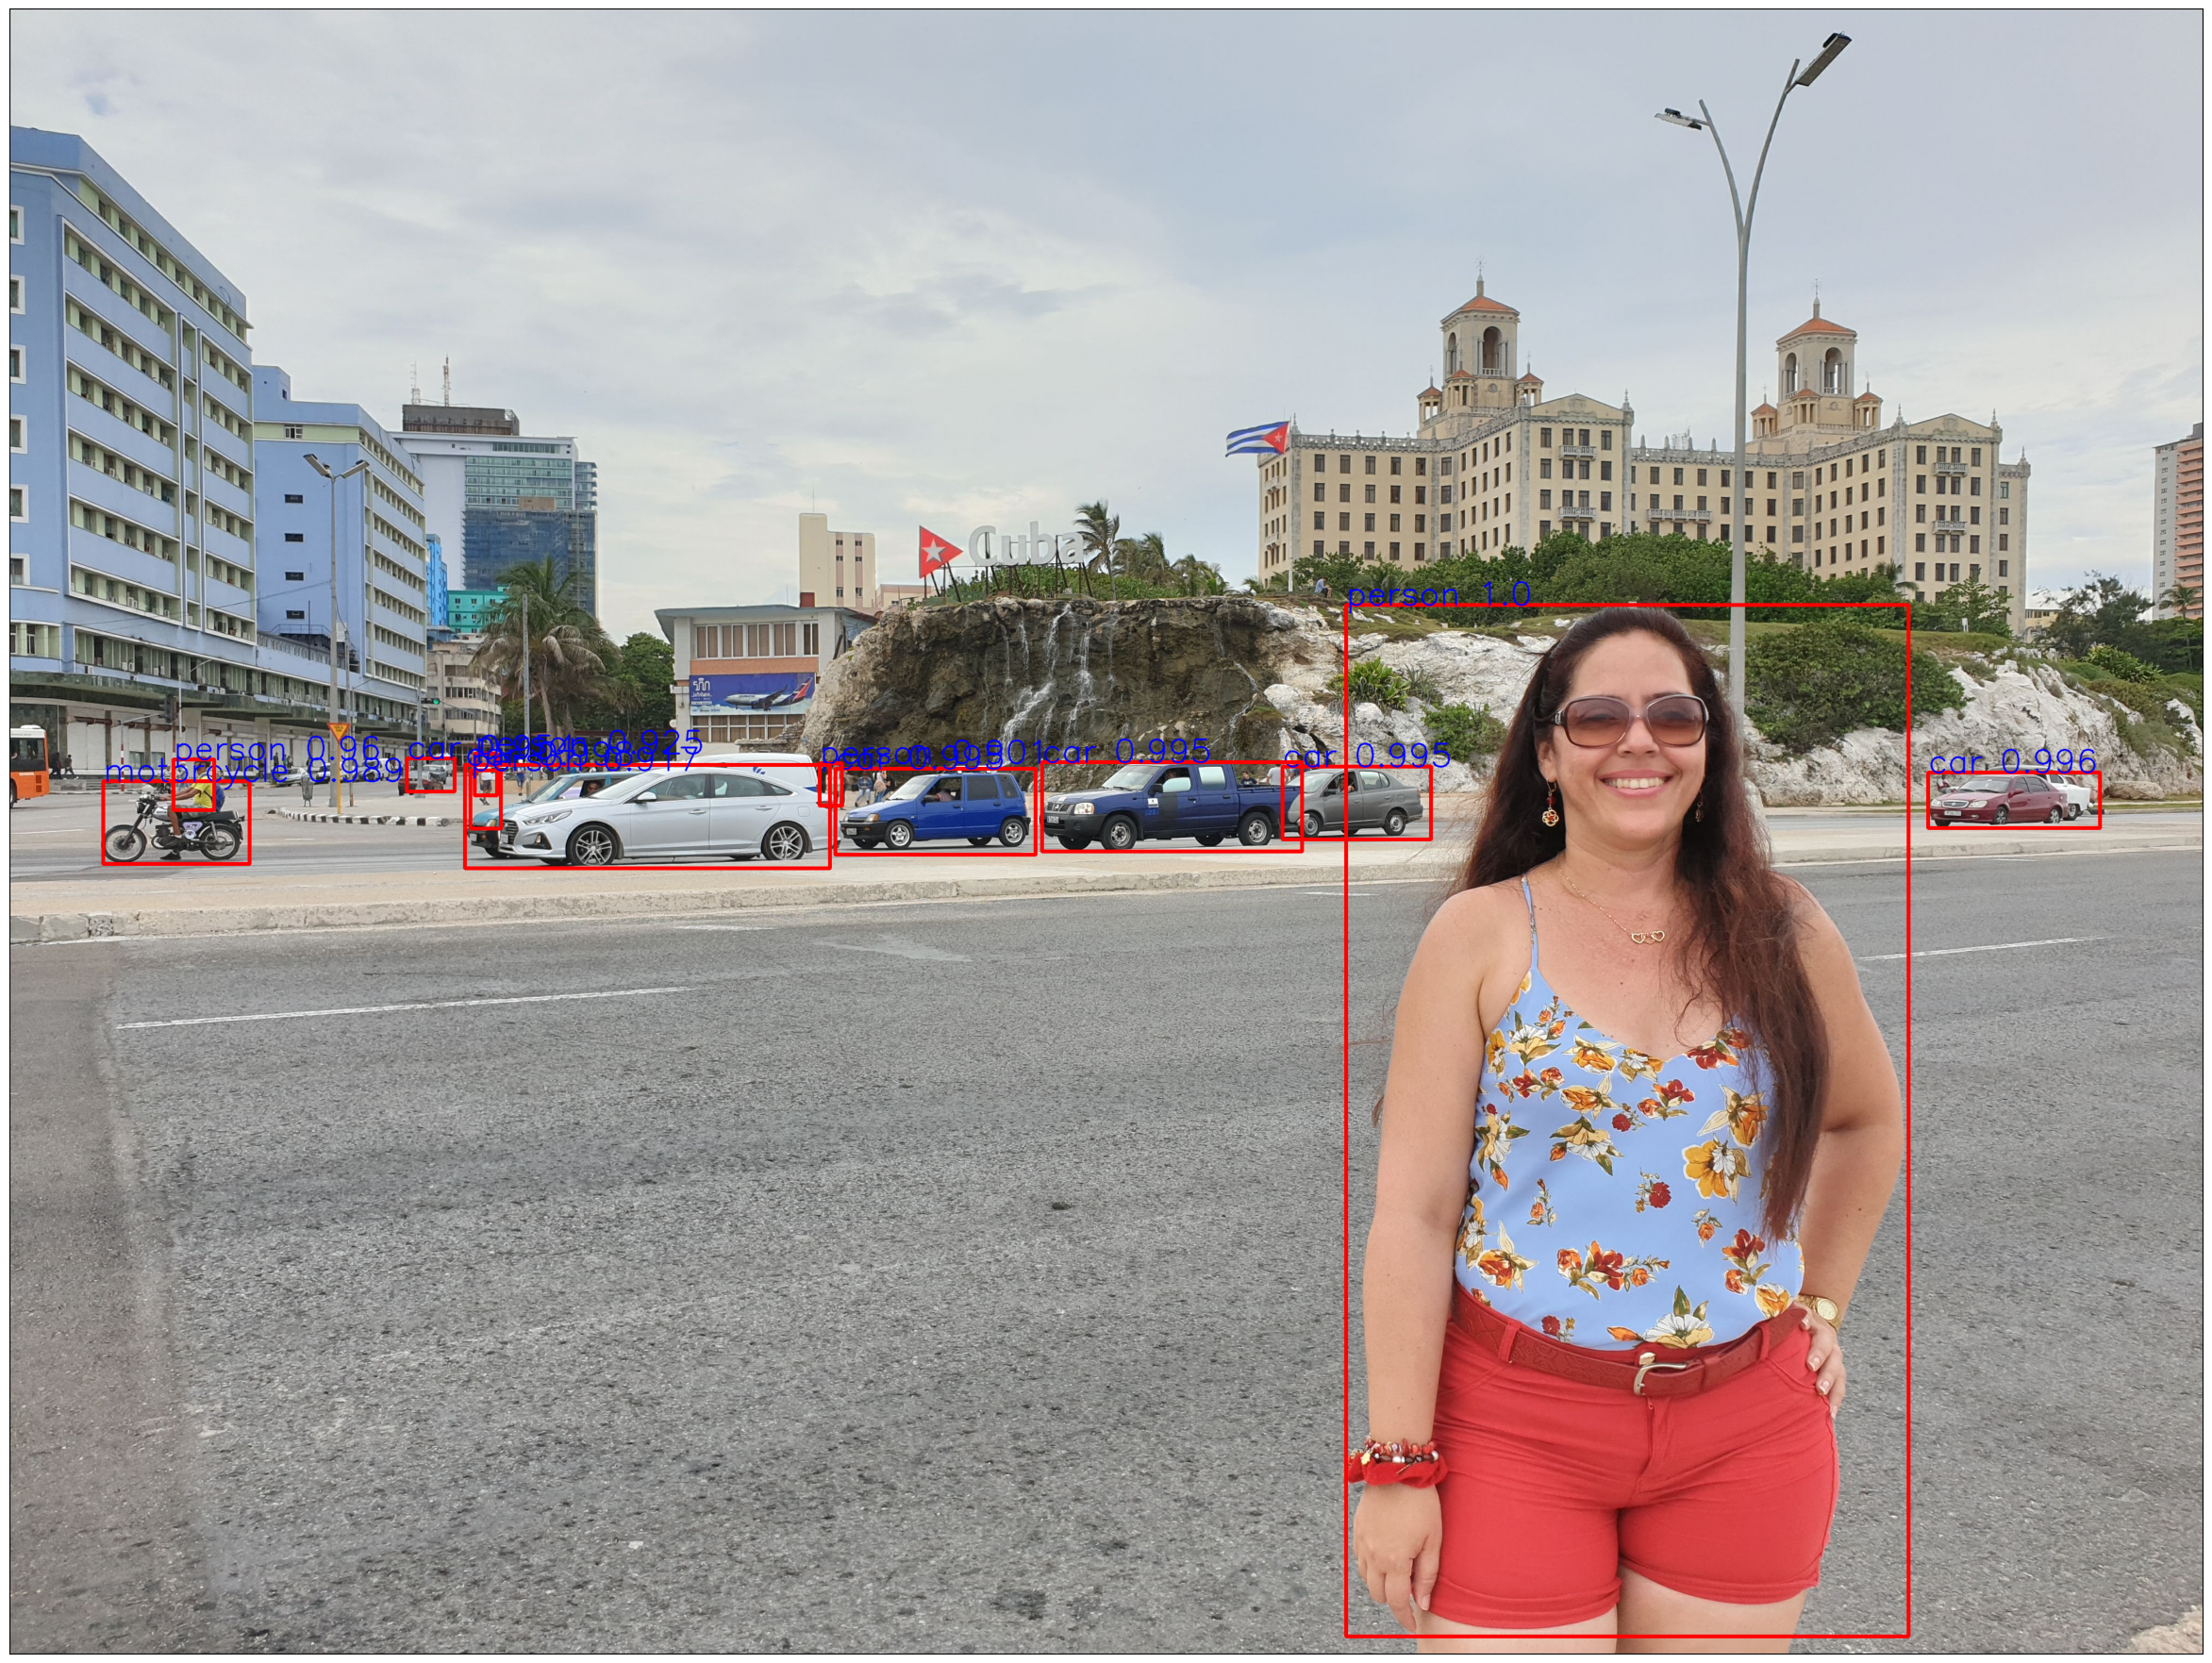

In [ ]:
img = plt.imread(path_image).copy()
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
  box = box.tolist()
  label_class=model.config.id2label[label.item()]
  name=f"{label_class} {round(score.item(), 3)}"
  img=cv2.rectangle(img,(int(box[0]),int(box[1])),(int(box[2]),int(box[3])),(255,0,0),5)
  img=cv2.putText(img, name, (int(box[0]),int(box[1])), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2, cv2.LINE_AA)


plt.figure(figsize=(30,30))
plt.xticks([])
plt.yticks([])
plt.imshow(img)

## Texto a imagen

In [ ]:
from diffusers import StableDiffusionPipeline

In [ ]:
model_id = "sd-legacy/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
prompt = "A cat on a bicycle on the beach"
image = pipe(prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
print(image.images)
image=image.images[0]
image.save("cat_bicycle.png")

[<PIL.Image.Image image mode=RGB size=512x512 at 0x797D085FB6D0>]


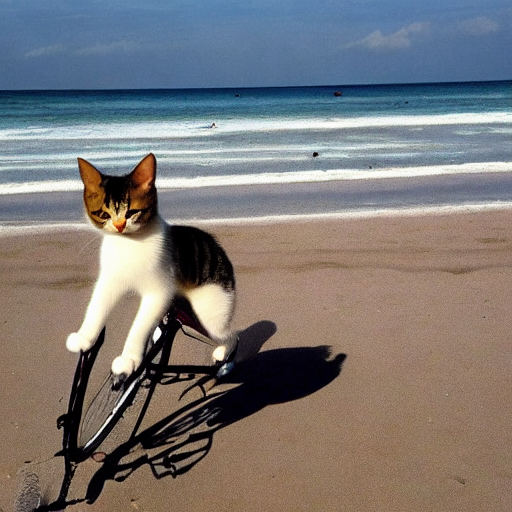

In [ ]:
image

## Traducir audios

In [ ]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration
from datasets import Audio, load_dataset
from IPython import display

In [ ]:
# Cargar el modelo y procesador
processor = WhisperProcessor.from_pretrained("openai/whisper-large-v2")
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-large-v2")
forced_decoder_ids = processor.get_decoder_prompt_ids(language="spanish", task="transcribe")

In [ ]:
## Cargar los datos
#ds = load_dataset("common_voice", "es", split="test", streaming=True)
dataset = load_dataset("mozilla-foundation/common_voice_11_0", "es", split="test", streaming=True )

In [ ]:
sampling_rate=16_000
ds = dataset.cast_column("audio", Audio(sampling_rate=sampling_rate))

In [ ]:
## Cargar primer audio
input_speech = next(iter(ds))["audio"]
input_features = processor(input_speech["array"], sampling_rate=input_speech["sampling_rate"], return_tensors="pt").input_features

Reading metadata...: 15520it [00:00, 19360.91it/s]


In [ ]:
# generar ids de tokens
predicted_ids = model.generate(input_features, forced_decoder_ids=forced_decoder_ids)
# decodificar a texto
transcription1 = processor.batch_decode(predicted_ids)

transcription2 = processor.batch_decode(predicted_ids, skip_special_tokens=True)

In [ ]:
print(transcription1)
print(transcription2)

['<|startoftranscript|><|es|><|transcribe|><|notimestamps|> Habitan aguas poco profundas y rocosas.<|endoftext|>']
[' Habitan aguas poco profundas y rocosas.']


In [ ]:
input_speech

{'path': 'es_test_0/common_voice_es_19698530.mp3',
 'array': array([ 5.09317033e-11,  1.16415322e-10,  1.01863407e-10, ...,
        -5.49094111e-05,  2.18403147e-04,  7.60999246e-05]),
 'sampling_rate': 16000}

In [ ]:
display.display(display.Audio(input_speech["array"], rate=sampling_rate, autoplay=True))

In [ ]:
audios=[]
i=0
N=4  ## Hacer los primeros 4
for audio in ds:
  input_features = processor(audio["audio"]["array"], sampling_rate=audio["audio"]["sampling_rate"], return_tensors="pt").input_features
  audios.append(audio["audio"]["array"])
  predicted_ids = model.generate(input_features, forced_decoder_ids=forced_decoder_ids)
  transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)
  print(transcription)
  i+=1
  if (i==N):
    break


Reading metadata...: 15520it [00:00, 62696.70it/s]


[' Habitan aguas poco profundas y rocosas.']
[' Opera principalmente vuelos de cargotajes y regionales de carga.']
[' Tres.']
[' Realicé los estudios primarios en Francia para continuar luego en España.']


In [ ]:
for a in audios:
  display.display(display.Audio(a, rate=sampling_rate, autoplay=True))

### Un audio

In [ ]:
audio=display.Audio("/content/te-gusta-el-azul.mp3", rate=16000, autoplay=True)
display.display(audio)

In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment
import numpy as np

In [ ]:
# Cargar audio
audio = AudioSegment.from_mp3('/content/te-gusta-el-azul.mp3')

# Resample a 1600 Hz
audio = audio.set_frame_rate(16000)

# Convertir a numpy array
numpy_audio = np.array(audio.get_array_of_samples())

In [ ]:
input_features = processor(numpy_audio, sampling_rate=16000, return_tensors="pt").input_features

In [ ]:
predicted_ids = model.generate(input_features, forced_decoder_ids=forced_decoder_ids)
transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)
print(transcription)

[' ¿Te gusta el azul?']
